# Ancient Secrets of Prediction

During the world war, the army need to predict the extact angle at which a bomb need to be thrown. Or predict the position where bomb will hit. In the ancient egypt, they need to predict the time of Solar eclips and the rains. If you look closely, every human science is evolved around predictions. We predict for survival. Actually, the brain roles is to predict for survival. The predictions are based on what we learnt from the past.

As part of this tutorial, we are going to learn to predict using basic mathematics. This is usually called Machine Learning. We would start with extremely simple example and then we will gradually reach image recognition.

We are not going to use any libraries such as Numpy, Scikit learn or Tensorflow. We will be coding most of the algorithms from scratch using Python. So, make yourselves confortable with Python.

## Simple Two variables

**Q:** *On your first trip to super market, you purchased **three** apples and your overall expense was **six** dollars. On your second trip, you purchased **five** apples and it costed you **eight** dollars. Please note that the total expense also includes parking charges which is same in both the case. 
If you have to go to supermarket to buy **ten** apples, how much will it cost?*


Before going further, please think for a moment and try to solve it.

-----

To begin with, I want to stick to a standard formulation of such problem. So, I will introduce some symbols. These are pretty simple.

We can simply say:

$$ Expense = parking\_charges + cost\_of\_apple * apples $$

Or we can say, in general formal notation: 

$$y = \beta0 + \beta{1}*x1$$
Where:

$y - Expense$

$\beta{0} - Fixed\ cost\ i.e.\ parking$

$\beta{1} - Cost\ of\ apples$

You can also represent it using the line. Where y axis has expenses and x axis represents apples.
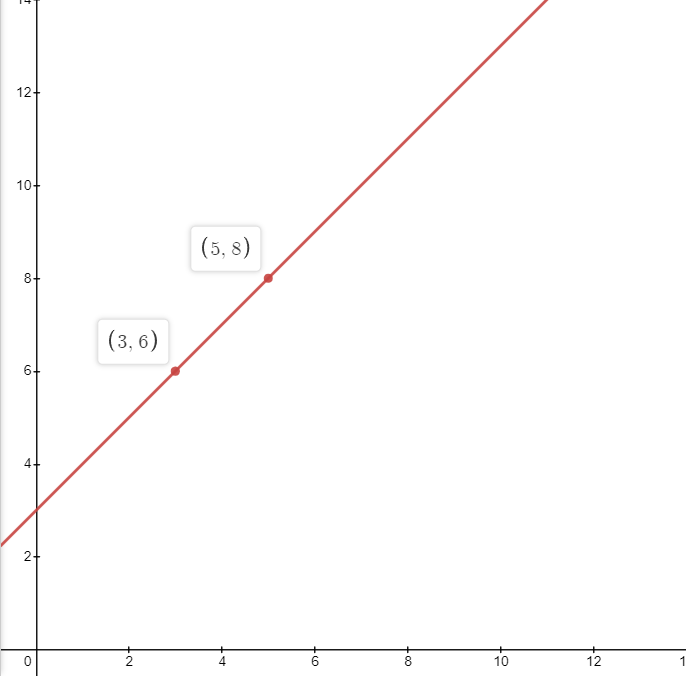

All we need to figure out is the equation of line.



Now, lets fill-in the values. For the first trip, the equation is:
$$6 = \beta0 + \beta{1}*3$$

And for your second trip, the equation is:
$$8 = \beta0 + \beta{1}*5$$

Can you solve these equations for $\beta0\ and\ \beta{1}?$

If you subtract first equation from second equation, you will get: $8 - 6 = \beta{1}*2$
Which means $\beta{1}$ is 1

If you take this value of $\beta{1}$ and substitute in Equation 1. You can compute $\beta{0}$:

$6 = \beta0 + 1 * 3$
$\beta0 = 3$

So, your final equation is: $y = 3 + 1*x1$

Now, we can answer the question about the expenses for 10 apples.
$$y = 3 + 1*10 = 13$$

**Expense is 13**

## A simple three variables equation

Very Simple right? The main idea was to give you an overview of symbols we are going to use.

So, we figured out the model. The model is basically the line that is going thru the data points and once we have the model, we can quickly predict the outcome for unseen values.

Now, let's level-up the game. What if we have three variables in the equation.

Imagine that we are buying apples and mangoes this time and there is a parking charges on every trip.

Here is the details of various expenses:

$1 Apple + 1 Mango + Parking = 35$

$3 Apples + 2 Mangoes + Parking = 75$

$4 Apples + 3 Mangoes + Parking = 105$

$5 Apples + 5 Mangoes + Parking = ???$


Before going further, Please take time to solve this.

The approach to solving these three variable equations is to reduce these equations into two variable and then reduce two equations into one equation and solve it.

Lets rewite these equations:

$A + M + P = 35$

$3A + 2M + P = 75$

$4A + 3M + P = 105$


If we subtract first equation from second, we would get:
$2A + M = 40$

If we subtract second equation from third, we would get:
$A + M = 30$

Now, if subtract these last two equations, M will be eliminated, we will be able to find the value of A.

A = 10

Now, with this we can find value of M: 10 + M = 30

Therefore, M = 20

Now, putting it back in first equation, we can find Parking charges:

10 + 20 + P = 35
P = 5

Now, once we know these three values, we can answer all the combinations of apples, mangoes and parking:
$5 Apples + 5 Mangoes + Parking = 5*10 + 5*20 + 5 = 155$

I am sure that most of the people would have no dificulty in following so far.

We can actually solve the consecutive equations of any number of variable by following the same process as long as the equations are unique.

For example, you can not find values of A, M, P from these three equations:

$A + M + P = 35$

$3A + 3M + 3P = 105$

$2A + 2M + 2P = 70$

## Solving it using code in Python

-----

*Now, can you write a program that can solve any number of consecutive equations?*

Specifically, you need to write a python function that takes the equations as array of arrays and return an array containing the values of the variables.

For example:
<pre>
eqns = [
    [1, 1, 1, 35],
    [3, 2, 1, 75],
    [4, 3, 1, 105]
   ]
</pre>
**solve(eqns)** should return $[10, 20, 5]$

In [14]:
#TODO: Insert a video of the animation

In [11]:
# It has two parts to it. In the first we will eliminate the variables as we go from top to bottom.
def normalize(E):
    for i in range(len(E)):
        for j in range(i+1, len(E)):
            mult = E[j][i]/E[i][i]
            for k in range(i, len(E[i])):
                E[j][k] -= E[i][k]*mult
    return E

In [12]:
# The second part involves solving the variables from bottom up:
def solve_normalized(E):
    solution = [0 for _ in range(len(E))]
    i = len(E) - 1
    k = len(E[0]) - 2
    while i > -1:
        row = E[i]
        sm = 0
        for kk in range(k+1, len(row) - 1):
            sm += row[kk]*solution[kk]
        solution[k] = (row[-1] - sm)/row[k]
        i -= 1
        k -= 1
    return solution

In [13]:
def solve(E):
    E = normalize(E)
    return solve_normalized(E)

In [18]:
# Lets test it out
eqns = [
    [1, 1, 1, 35],
    [3, 2, 1, 75],
    [4, 3, 1, 105]
   ]
solve(eqns)

[10.0, 20.0, 5.0]

It works! You can try it with other consecutive equations. 

Question: If you have m equations, how many times will the loop run? Or what will be the order of complexity?


The number of times the loop runs is of the order of approximately $n^3$ if $n$ is the number of equations or number of variables. 

If solving 4 variables equations is taking 1000 ms, solving 8 variables equations will take approximately how much time?

- A. 2000 ms
- B. 8000 ms
- C. 1000 ms
- D. Can't predict


The answer is B. 

This also means that solving 40 variables is going to take 1 millions ms i.e. 1000 seconds.

## Solving Quadratic equation

Now, imagine that the relationship between input and output is non linear. 

Say, you are have a website. If the traffic on your website is increasing, you need to add more servers. So, you need to predict the traffic on your website. The traffic is a non-linear function of time. It is basically a second-degree polynomial.

| time   | traffic |
| ----| --- |
| 1   |6    |
| 2   |12   |
| 3   |20   |
| 4   |??   |

We need to predict the value of traffic at time = 4.

How would we proceed? Give it a try by yourselves before proceeding.

Please note that it is a very real scenerio. People do use this technique to predict the traffic.

Hint: assume the equation to be $traffic = a*t^2 + b*t + c$ and solve it for a, b and c

Solution:

After placing the values of t in this equation, we get three consecutive equations for a, b and c:

$ a +  b + c = 6$

$4a + 2b + c = 12$

$9a + 3b + c = 20$


In [25]:
# Lets use the above created code:
eqn = [[1, 1, 1, 6], [4, 2, 1, 12], [9, 3, 1, 20]]
result = solve(eqn)

In [26]:
result

[1.0, 3.0, 2.0]

Now using these values we can calculate the traffic at t = 4

$traffic = a*t^2 + b*t + c = 1.0*4^2 + 3.0*4 + 2.0 = 16 + 12 + 2 = 30$

Lets make it a bit more automatic. 
We can express $a*t^2 + b*t + c$ as matrix multiplication of two things:

$$a*t^2 + b*t + c = \begin{vmatrix} a & b & c\end{vmatrix} \times \begin{vmatrix}
t^2 \\
t \\
1
\end{vmatrix}$$

In [35]:
def multiply_vectors(A, B):
    out = []
    for i in range(len(A)):
        out.append(A[i]*B[i])
    return sum(out)

In [36]:
multiply_vectors(result, [4**2, 4, 1])

30.0

If we want to fit a polynomial of n degree, many distinct data points do we need:

1. $n^2$
2. n + 1
3. 1
4. Impossible to determine

Answer: n+1

In [48]:
# Lets try to automate entire process

def solve_poly(x, y, xp):
    eqns = []
    for i in range(len(x)):
        eqn = [y[i]]
        xcoeff = 1
        for _ in range(len(x)):
            eqn.append(xcoeff)
            xcoeff *= x[i]
        eqn.reverse()
        eqns.append(eqn)
#     print(eqns)
    coeff = solve(eqns)
#     print(coeff)
    xpows = []
    xpow = 1
    for _ in range(len(x)):
        xpows.append(xpow)
        xpow *= xp
    xpows.reverse()
    return multiply_vectors(coeff, xpows)

In [49]:
solve_poly([1,2, 3], [6, 12, 20], 4)

30.0

## Linear Approximation

So far we have assumed that the curve is fitting perfectly. What if the curve doesn't fit properly? This could be because of multiple reasons:
1. The underlying relationship is fairly complex
2. There could be noise in the data

In [60]:
x = np.array([1,2,3])
y  = 4*x + 3 + 2*np.random.random((1,3))

In [61]:
y

array([[ 8.47227525, 11.25775797, 16.38661711]])

Imagine, there is a factory whose input and output are given as follows:

| input   | output |
| ---- | ---       |
| 1   |8      |
| 2   |10.5   |
| 3   |16     |
| 4   |??     |
